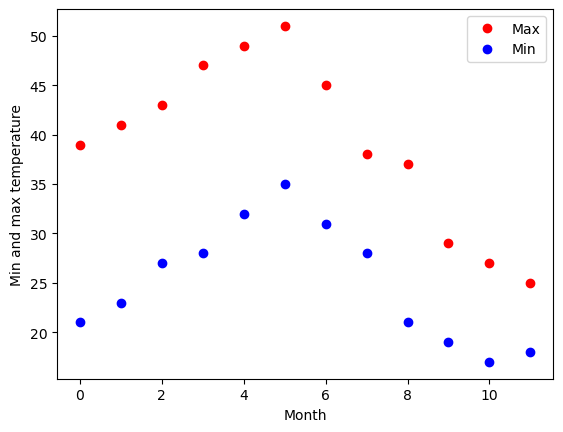

In [6]:
#q1 - add trendline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


month = np.arange(12)
plt.plot(month, temp_max, 'ro')
plt.plot(month, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend(["Max","Min"])

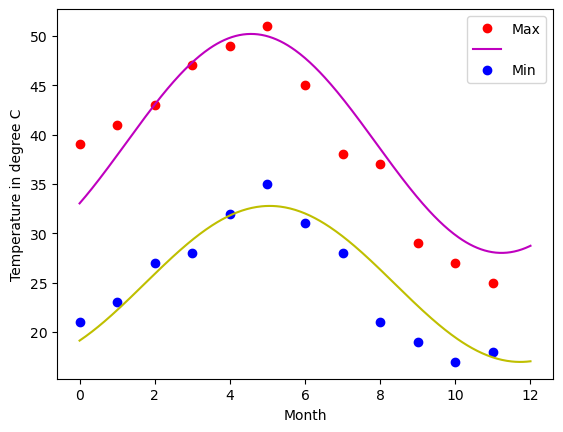

In [10]:
# fitting to periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, month,temp_max, [40, 20, 0])
res_min, cov_min = curve_fit(yearly_temps, month,temp_min, [-40, 20, 0])


#plotting the curve
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature in degree C')
plt.legend(["Max","","Min"])

plt.show()

In [11]:
#q2 - 1. Create a pie chart presenting the male/female proportion
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

import pandas as pd
import seaborn as sns

url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.info()

titanic.shape
df = titanic.iloc[:-1,:]
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


(1309, 14)

Text(0.5, 1.0, 'Male/Female Proportion')

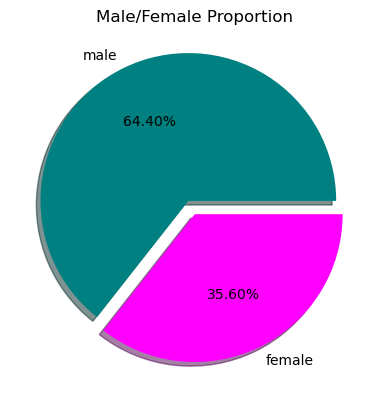

In [12]:
# pie chart

Gender=df['sex'].value_counts()

fig, ax = plt.subplots()
ax.pie(Gender.values.tolist(), labels=Gender.index.values.tolist(),autopct="%0.2f%%", colors=['Teal', 'magenta'],
       shadow=True, explode=[0.1,0])
ax.set_title('Male/Female Proportion')

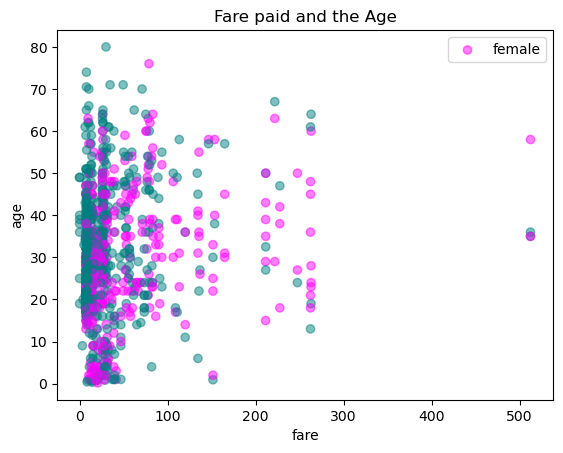

In [20]:
# Scatter plot

fig,ax= plt.subplots()
mapping={'male':'Teal','female':'magenta'}
ax.scatter(df['fare'],df['age'],alpha=0.5,c=df['sex'].map(mapping))
ax.set_xlabel("fare")
ax.set_ylabel('age')
ax.set_title('Fare paid and the Age')
ax.legend(["female"])